In [11]:
### Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [12]:
## Preparing the data set
df = fetch_california_housing()

In [16]:
X = pd.DataFrame(df.data, columns=df.feature_names)
y = pd.Series(df.target)

In [17]:
X

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

In [15]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Length: 20640, dtype: float64

In [18]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [19]:
x = X[['MedInc','AveRooms']]
x

MedInc  AveRooms
0      8.3252  6.984127
1      8.3014  6.238137
2      7.2574  8.288136
3      5.6431  5.817352
4      3.8462  6.281853
...       ...       ...
20635  1.5603  5.045455
20636  2.5568  6.114035
20637  1.7000  5.205543
20638  1.8672  5.329513
20639  2.3886  5.254717

[20640 rows x 2 columns]

In [20]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [23]:
## Building th model
model = LinearRegression()
model

LinearRegression()

In [24]:
## Fitting the model
model.fit(x_train,y_train)

LinearRegression()

In [27]:
## Predicting th results
y_pred  = model.predict(x_test)
y_pred

array([1.16230214, 1.49913482, 1.95573059, ..., 4.33311942, 1.59978552,
       1.98667198])

In [28]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

c:\Users\irfan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


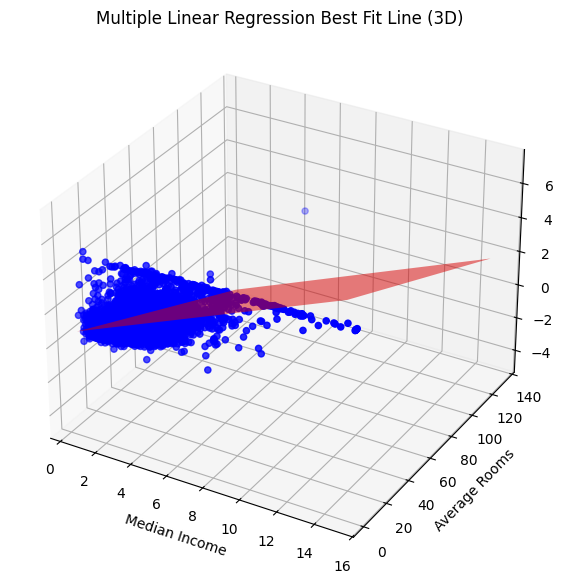

In [30]:
## Visualizing the best fit
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x_test['MedInc'], x_test['AveRooms'], y_test, color='blue', label='Actual Data')

x1_range = np.linspace(x_test['MedInc'].min(), x_test['MedInc'].max(), 100)
x2_range = np.linspace(x_test['AveRooms'].min(), x_test['AveRooms'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)

z = model.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

ax.plot_surface(x1, x2, z, color='red', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('Median Income')
ax.set_ylabel('Average Rooms')
ax.set_zlabel('House Price')
ax.set_title('Multiple Linear Regression Best Fit Line (3D)')

plt.show()